In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic = pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
def determine_child(passenger):
    age, sex = passenger 
    if age < 16:
        return "child"
    else:
        return sex
    
def replace_class(Pclass):
    if Pclass == 1:
        return 'first'
    elif Pclass == 2:
        return 'second'
    else:
        return 'third'
    
    
titanic['Person'] = titanic[["Age", "Sex"]].apply(determine_child, axis =1)    
titanic['Pclass'] = titanic['Pclass'].apply(replace_class)
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,third,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,first,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,third,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,third,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,second,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


<p>Questions:</p>
    <p>1) Who were the passengers on the Titanic? </p>
    <p>2) What factor help someone survive the Titanic? </p>
    <p>3) What deck were the passengers on and how does it relate to their class? </p>
    <p>4) Where did the passengers come from? </p>
    <p>5) Who was alone and who was with their family? </p>

<h1>Who Were The Passengers on The Titanic? </h1>

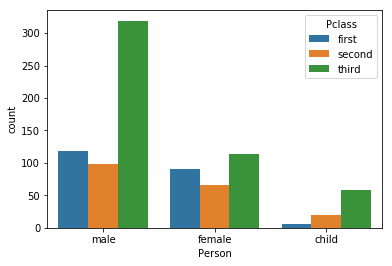

In [4]:
sns.countplot(x = "Person", data = titanic, hue = "Pclass", hue_order = ["first", "second", "third"])

Text(0.5, 1.0, 'Age Distribution')

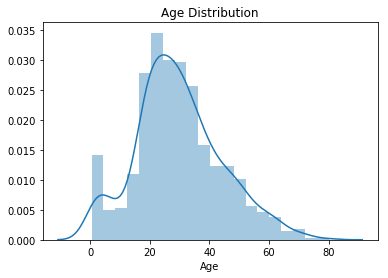

In [5]:
titanic_age = titanic['Age'].dropna()
sns.distplot(titanic_age).set_title("Age Distribution")

In [6]:
titanic_age.mean()

29.69911764705882

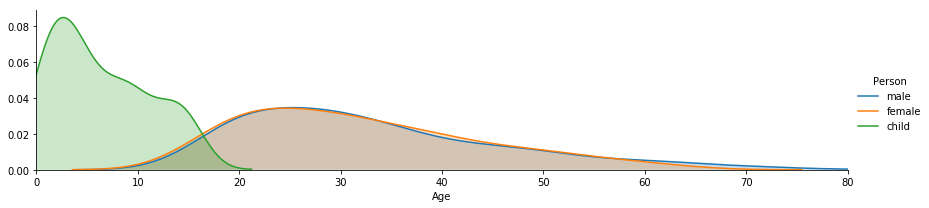

In [11]:
fig = sns.FacetGrid(titanic, hue = "Person", aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
fig.set(xlim = [0, titanic['Age'].max()]).add_legend()

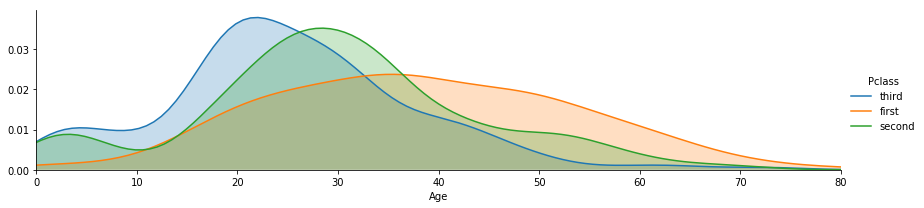

In [14]:
fig = sns.FacetGrid(titanic, hue = "Pclass", aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
fig.set(xlim = [0, titanic['Age'].max()]).add_legend()s